In [1]:
from sdv.demo import load_tabular_demo
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D
import sys
from sklearn.preprocessing import StandardScaler
np.set_printoptions(threshold=sys.maxsize)

In [2]:
dt=pd.read_csv('../save_data/preprocess_data.csv')
data=dt.drop(['Unnamed: 0'],axis=1)
data.head()

FEATTYPE  SCALE  elevation   aspect     slope Years_befo      NDVI  \
0         0    1.5         52  330.524   2.04472      0-1.8  0.193857   
1         0   18.0          1  225.000   1.86081      0-1.8  0.292597   
2         1    0.5          6  149.534   3.05130      0-1.8  0.339637   
3         1   45.0         26  346.373   5.24349      0-1.8  0.194702   
4         1    0.3         22  335.999  11.45630      0-1.8  0.155207   

     distance  total_curv  plan_curv  ...  landuse_Wetland  landuse_forest  \
0   17.340808   -0.282579  -0.181710  ...                0               0   
1   51.054059    0.282579   0.289513  ...                0               0   
2  130.601425   -0.208863  -0.102582  ...                0               0   
3  384.036599    0.159719   0.161805  ...                0               0   
4  370.113211   -0.651161  -0.205214  ...                0               0   

   landuse_urban  landuse_water  FACAFF_0  FACAFF_1  FACAFF_2  FACAFF_3  \
0              1              0         0         0         0         0   
1              0              0         0         0         0         0   
2              0              0         0         0         0         0   
3              1              0         1         0         0         0   
4              1              0         0         0         0         0   

   FACAFF_4  Year  
0         1   1.8  
1         1   1.8  
2         1   1.8  
3         0   1.8  
4         1   1.8  

[5 rows x 37 columns]

In [3]:
col= data.columns[pd.np.r_[1:5,6:37]]
x = np.array(data[col])
y=np.array(data['FEATTYPE'])
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 4)


C:\Users\Xiaoyi WU\AppData\Local\Temp\ipykernel_28668\2523797532.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  col= data.columns[pd.np.r_[1:5,6:37]]


In [8]:
X_train

array([[ 4.00000000e+01,  6.00000000e+00,  1.45923000e+02,
         6.33065000e+00,  3.64214000e-01,  1.33650462e+01,
        -4.91442000e-02, -6.46247000e-02, -1.54804000e-02,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.45000000e+02],
       [ 1.00000000e+02,  7.70000000e+01,  3.23945000e+02,
         1.18016000e+01,  2.73560000e-01,  1.36588524e+01,
        -1.22861000e-01,  6.53055000e-02,  1.88166000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00

In [6]:
original_train=np.concatenate((y_train.reshape(-1,1),X_train),axis=1)
original_train


array([[ 1.00000000e+00,  4.00000000e+01,  6.00000000e+00,
         1.45923000e+02,  6.33065000e+00,  3.64214000e-01,
         1.33650462e+01, -4.91442000e-02, -6.46247000e-02,
        -1.54804000e-02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.45000000e+02],
       [ 0.00000000e+00,  1.00000000e+02,  7.70000000e+01,
         3.23945000e+02,  1.18016000e+01,  2.73560000e-01,
         1.36588524e+01, -1.22861000e-01,  6.53055000e-02,
         1.88166000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [7]:
train_data=pd.DataFrame(data=original_train,columns=data.columns[pd.np.r_[0:5,6:37]])
train_data.head()

C:\Users\Xiaoyi WU\AppData\Local\Temp\ipykernel_28668\325209383.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  train_data=pd.DataFrame(data=original_train,columns=data.columns[pd.np.r_[0:5,6:37]])


FEATTYPE    SCALE  elevation   aspect     slope      NDVI    distance  \
0       1.0   40.000        6.0  145.923   6.33065  0.364214   13.365046   
1       0.0  100.000       77.0  323.945  11.80160  0.273560   13.658852   
2       1.0    2.000       37.0  123.447  19.44620  0.283779  523.955944   
3       0.0   10.000       14.0  109.359   3.03363  0.156227  158.991559   
4       0.0    0.023       26.0  241.699   3.42549  0.135823  283.279297   

   total_curv  plan_curv  prof_curv  ...  landuse_Wetland  landuse_forest  \
0   -0.049144  -0.064625  -0.015480  ...              0.0             1.0   
1   -0.122861   0.065306   0.188166  ...              0.0             1.0   
2    0.356296   0.070069  -0.286226  ...              0.0             1.0   
3    0.086002   0.210165   0.124163  ...              0.0             0.0   
4    0.368582   0.195926  -0.172656  ...              0.0             0.0   

   landuse_urban  landuse_water  FACAFF_0  FACAFF_1  FACAFF_2  FACAFF_3  \
0            0.0            0.0       1.0       0.0       0.0       0.0   
1            0.0            0.0       1.0       0.0       0.0       0.0   
2            0.0            0.0       0.0       0.0       0.0       0.0   
3            1.0            0.0       0.0       1.0       0.0       0.0   
4            1.0            0.0       0.0       0.0       0.0       0.0   

   FACAFF_4   Year  
0       0.0  145.0  
1       0.0  145.0  
2       1.0  145.0  
3       0.0  145.0  
4       1.0   65.0  

[5 rows x 36 columns]

In [10]:

model = CTGAN()
model.fit(train_data)

C:\Users\Xiaoyi WU\.conda\envs\py38\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Xiaoyi WU\.conda\envs\py38\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Xiaoyi WU\.conda\envs\py38\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Xiaoyi WU\.conda\envs\py38\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Xiaoyi WU\.conda\en

In [11]:
original_train.shape

(2618, 36)

In [ ]:
new_data = model.sample(num_rows=original_train.shape[0])
model.save('my_model.pkl')
loaded = CTGAN.load('my_model.pkl')
new_data = loaded.sample(num_rows=train_data.shape[0])


In [ ]:
new_data

SCALE  elevation      aspect      slope      NDVI     distance  \
0     18.4297       50.0  220.839866   5.483863  0.240295   294.362604   
1      0.0000      112.0  228.217007  17.414509  0.197453   992.073824   
2     14.5643      187.0   70.339960   5.031722 -0.013293   704.637453   
3      0.0000       78.0  359.663000  10.167865  0.290074   144.720759   
4     87.8782       89.0   64.535240   9.564407  0.225377  2989.327155   
...       ...        ...         ...        ...       ...          ...   
2613   0.0000       68.0  333.414423   8.412879  0.319416    96.859966   
2614   0.0000      233.0  359.663000  12.141940  0.407275   731.671645   
2615   0.0000      131.0  353.485854   7.364463  0.197518   491.736192   
2616  84.2286       37.0  214.913261  11.280668  0.336145   267.886146   
2617  15.4716      265.0  221.905931  10.892272  0.319205   177.540866   

      total_curv  plan_curv  prof_curv  Main_Rock__Granitic Rocks  ...  \
0       1.058665  -0.036169  -0.424776                        1.0  ...   
1      -0.002057   0.013582  -0.151162                        0.0  ...   
2      -0.039352  -0.606176   0.047949                        0.0  ...   
3      -0.005848   0.210423   0.211174                        0.0  ...   
4      -0.160791  -0.091920  -0.499726                        0.0  ...   
...          ...        ...        ...                        ...  ...   
2613    0.200729  -0.490484  -0.067668                        0.0  ...   
2614    0.389746  -0.013225  -0.090216                        0.0  ...   
2615   -0.159778  -0.030674   0.215305                        0.0  ...   
2616   -0.044038   0.054467   0.015367                        1.0  ...   
2617   -0.295613   0.170584   0.037603                        1.0  ...   

      landuse_Wetland  landuse_forest  landuse_urban  landuse_water  FACAFF_0  \
0                 0.0             1.0            0.0            0.0       0.0   
1                 0.0             0.0            0.0            0.0       0.0   
2                 0.0             1.0            0.0            0.0       1.0   
3                 0.0             1.0            0.0            0.0       0.0   
4                 0.0             0.0            1.0            0.0       0.0   
...               ...             ...            ...            ...       ...   
2613              0.0             0.0            0.0            0.0       0.0   
2614              0.0             1.0            0.0            0.0       0.0   
2615              0.0             0.0            0.0            0.0       0.0   
2616              0.0             1.0            0.0            0.0       0.0   
2617              0.0             0.0            0.0            0.0       0.0   

      FACAFF_1  FACAFF_2  FACAFF_3  FACAFF_4   Year  
0          0.0       0.0       0.0       0.0   68.2  
1          0.0       0.0       0.0       0.0  147.0  
2          0.0       0.0       0.0       1.0  142.6  
3          0.0       0.0       0.0       0.0   66.3  
4          0.0       0.0       0.0       0.0   64.5  
...        ...       ...       ...       ...    ...  
2613       0.0       0.0       0.0       0.0  148.7  
2614       1.0       0.0       0.0       0.0  145.4  
2615       0.0       0.0       1.0       0.0  145.9  
2616       0.0       0.0       0.0       0.0  144.2  
2617       0.0       0.0       0.0       0.0  148.3  

[2618 rows x 35 columns]

In [ ]:
evaluate(new_data, train_data)

C:\Users\Xiaoyi WU\.conda\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Xiaoyi WU\.conda\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.5108723948436872

In [ ]:
new_train_data=pd.concat(
    [new_data, train_data],
    axis=0,
)
print(new_train_data.shape)
new_train_data.head()

(5236, 35)


SCALE  elevation      aspect      slope      NDVI     distance  \
0  18.4297       50.0  220.839866   5.483863  0.240295   294.362604   
1   0.0000      112.0  228.217007  17.414509  0.197453   992.073824   
2  14.5643      187.0   70.339960   5.031722 -0.013293   704.637453   
3   0.0000       78.0  359.663000  10.167865  0.290074   144.720759   
4  87.8782       89.0   64.535240   9.564407  0.225377  2989.327155   

   total_curv  plan_curv  prof_curv  Main_Rock__Granitic Rocks  ...  \
0    1.058665  -0.036169  -0.424776                        1.0  ...   
1   -0.002057   0.013582  -0.151162                        0.0  ...   
2   -0.039352  -0.606176   0.047949                        0.0  ...   
3   -0.005848   0.210423   0.211174                        0.0  ...   
4   -0.160791  -0.091920  -0.499726                        0.0  ...   

   landuse_Wetland  landuse_forest  landuse_urban  landuse_water  FACAFF_0  \
0              0.0             1.0            0.0            0.0       0.0   
1              0.0             0.0            0.0            0.0       0.0   
2              0.0             1.0            0.0            0.0       1.0   
3              0.0             1.0            0.0            0.0       0.0   
4              0.0             0.0            1.0            0.0       0.0   

   FACAFF_1  FACAFF_2  FACAFF_3  FACAFF_4   Year  
0       0.0       0.0       0.0       0.0   68.2  
1       0.0       0.0       0.0       0.0  147.0  
2       0.0       0.0       0.0       1.0  142.6  
3       0.0       0.0       0.0       0.0   66.3  
4       0.0       0.0       0.0       0.0   64.5  

[5 rows x 35 columns]

In [ ]:
new_train_X=new_train_data.iloc[:,1:]
new_test_Y=new_train_data.iloc[0:1,:]

In [ ]:
# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
new_train = sc.fit_transform(new_train_data)
X_test = sc.fit_transform(X_test)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

model = KNeighborsClassifier()

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(new_train_X, new_train_Y.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.619553953264344
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights).fit(X_train, y_train.ravel())
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

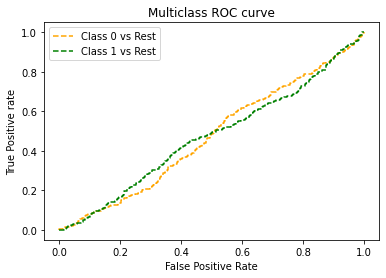

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [ ]:
knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1])

C:\Users\Xiaoyi WU\.conda\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print('k Nearest Neighbors:')
print('Accuracy:',knn_acc)
#print('ROC AUC=%.4f' % (knn_roc_auc))

In [ ]:
array = confusion_matrix(y_test, knn_pred)

knn_cm = pd.DataFrame(array, range(2), range(2))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(knn_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [ ]:
for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (knn_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (knn_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (knn_cls_f1[i]))
    print('----------------------------')